In [1]:
# Imports
%pylab inline
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('../../src/')
from plothelpers import *
from LateralInhibitionNamingGame import *
import pandas as pd

Populating the interactive namespace from numpy and matplotlib



# Preprocess

In [2]:
# Load data
values, cols = [], []
for d_inc in [0, 1, 10, 50, 100, 1000]:
    res = load_LING_simulation('../../results/LING03/', f'LING03-dinc-{d_inc}')
    for quantity in ['num_unique_words', 'num_words', 'successes']:
        values.append(res[quantity].mean(axis=0))
        values.append(res[quantity].std(axis=0))
        cols.append([d_inc, quantity, 'mean'])
        cols.append([d_inc, quantity, 'std'])

# Pd dataframe
df = pd.DataFrame(array(values).T)
df.columns = pd.MultiIndex.from_tuples(cols)
df.to_csv('LING03-plotdata.csv')

# Plot

In [2]:
# Read all data
data = pd.read_csv('LING03-plotdata.csv', header=[0,1,2], index_col=0)
params = json.load(open('LING03-params.json', 'r'))

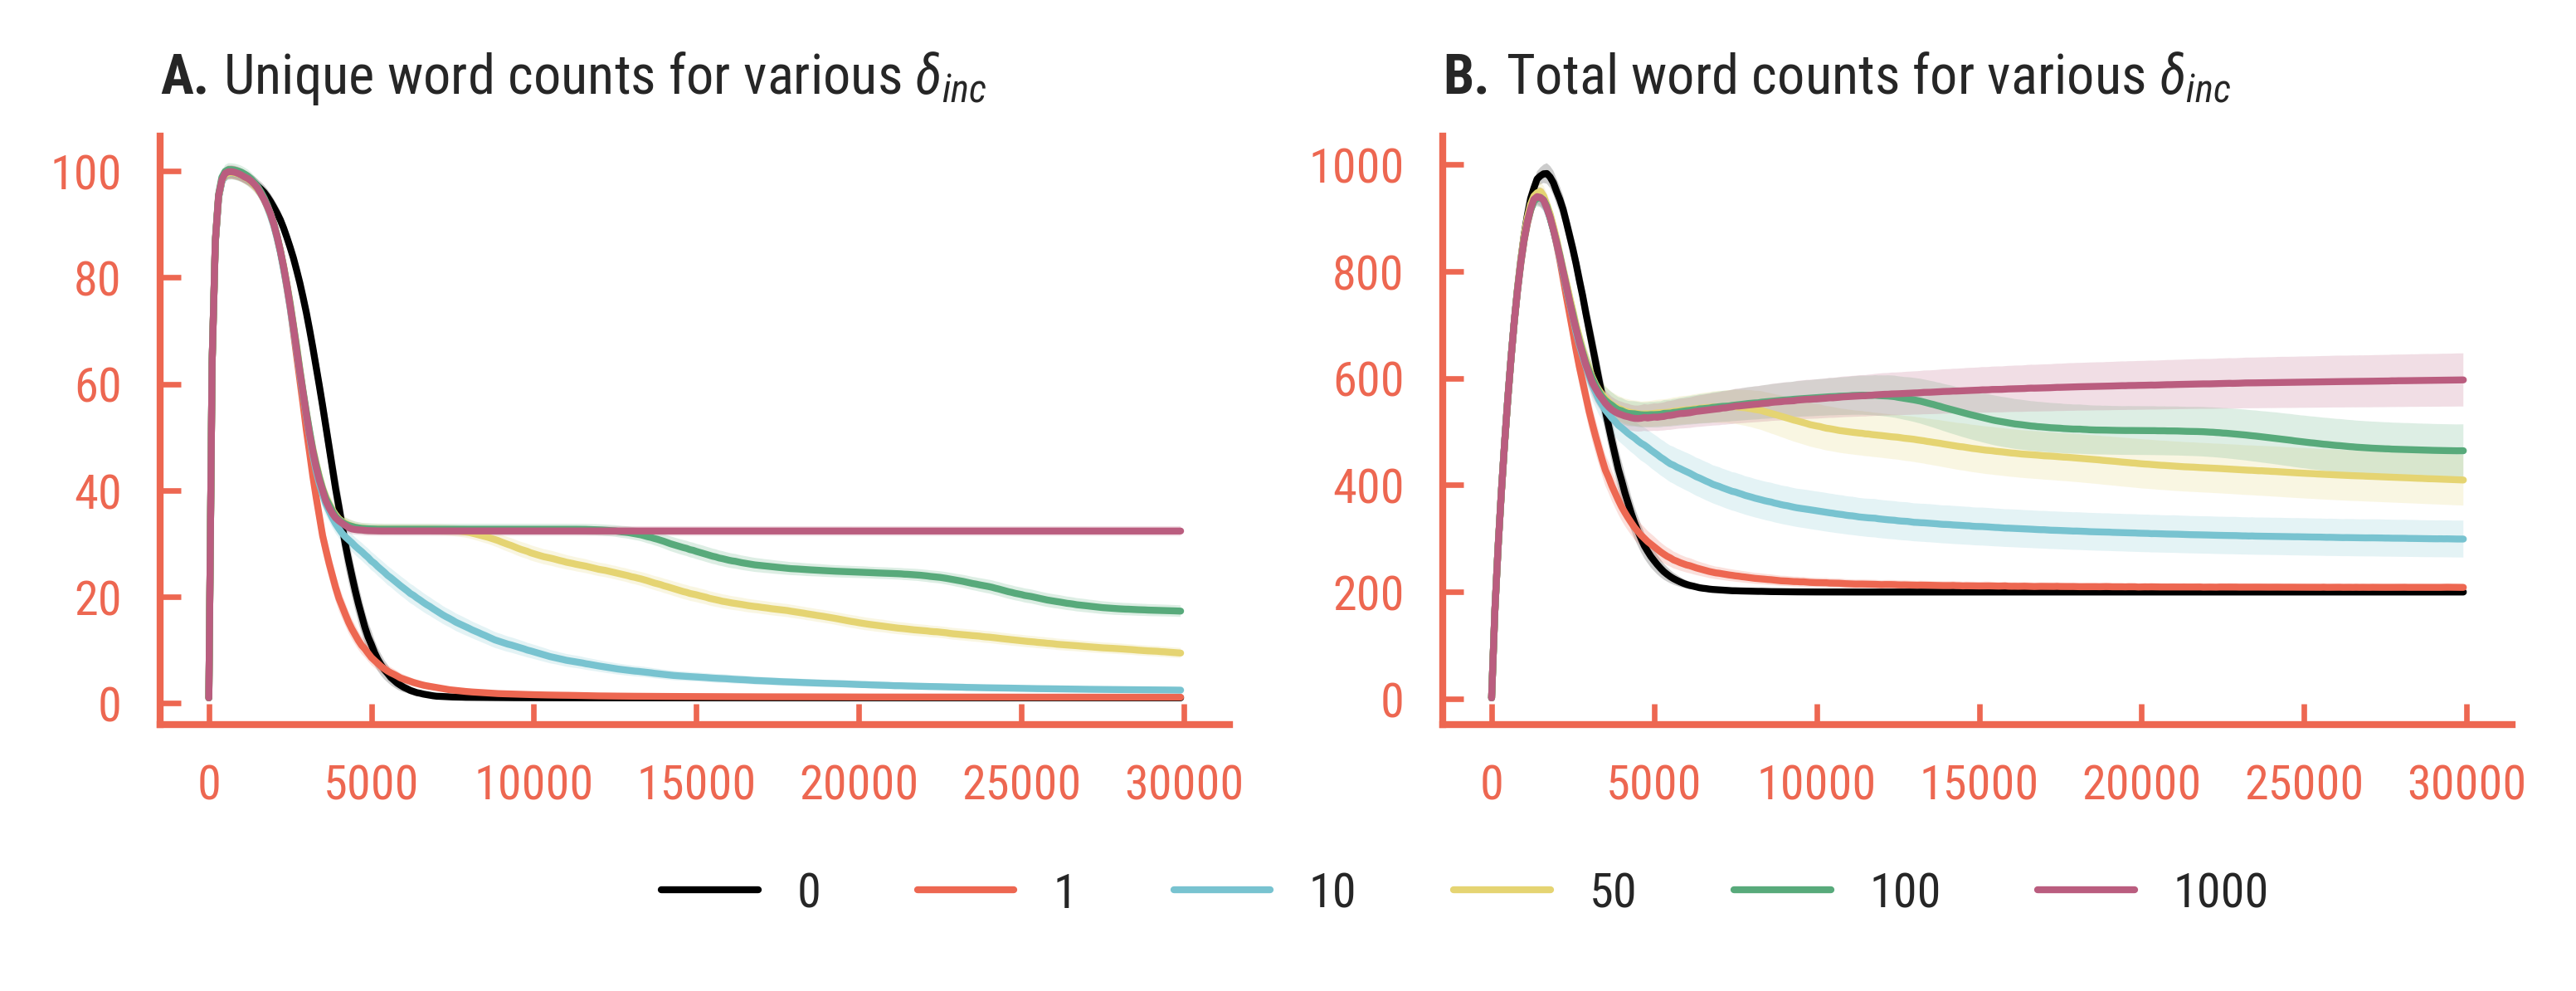

In [3]:
# plot
figure(figsize=cm2inch(12,3))
xs = arange(0, params['T'], params['res'])
d_incs = [0, 1, 10, 50, 100, 1000]

ax1 = subplot(121)
for d_inc in d_incs:
    res = data[str(d_inc)]
    mean = res['num_unique_words']['mean']
    std = res['num_unique_words']['std']
    plot(xs, mean, label=d_inc)
    fill_between(xs, mean+.25*std, mean-.25*std, alpha=.2)#, facecolor='k')
title('Unique word counts for various $\delta_{inc}$')
legend(ncol=6, bbox_to_anchor=(2,-.2))

ax2 = subplot(122)
for d_inc in d_incs:
    res = data[str(d_inc)]
    mean = res['num_words']['mean']
    std = res['num_words']['std']
    plot(xs, mean, label=d_inc)
    fill_between(xs, mean+.25*std, mean-.25*std, alpha=.2)#, facecolor='k')

title('Total word counts for various $\delta_{inc}$')

restyle_title(ax1, ax2)
sns.despine()
subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('LING03-results.pdf', bbox_inches='tight')

# Combined LING02-3

In [4]:
# Read all data
data3 = pd.read_csv('LING03-plotdata.csv', header=[0,1,2], index_col=0)
params3 = json.load(open('LING03-params.json', 'r'))

# Read all data from exp 2
data2 = pd.read_csv('../LING02/LING02-plotdata.csv', header=[0,1,2], index_col=0)
params2 = json.load(open('../LING02/LING02-params.json', 'r'))

# Fix columns
cols = []
for d_inh in [0] + [4**i for i in range(-4,3)]:
    for quantity in ['num_unique_words', 'num_words', 'successes']:
        cols.append([d_inh, quantity, 'mean'])
        cols.append([d_inh, quantity, 'std'])
data2.columns = pd.MultiIndex.from_tuples(cols)

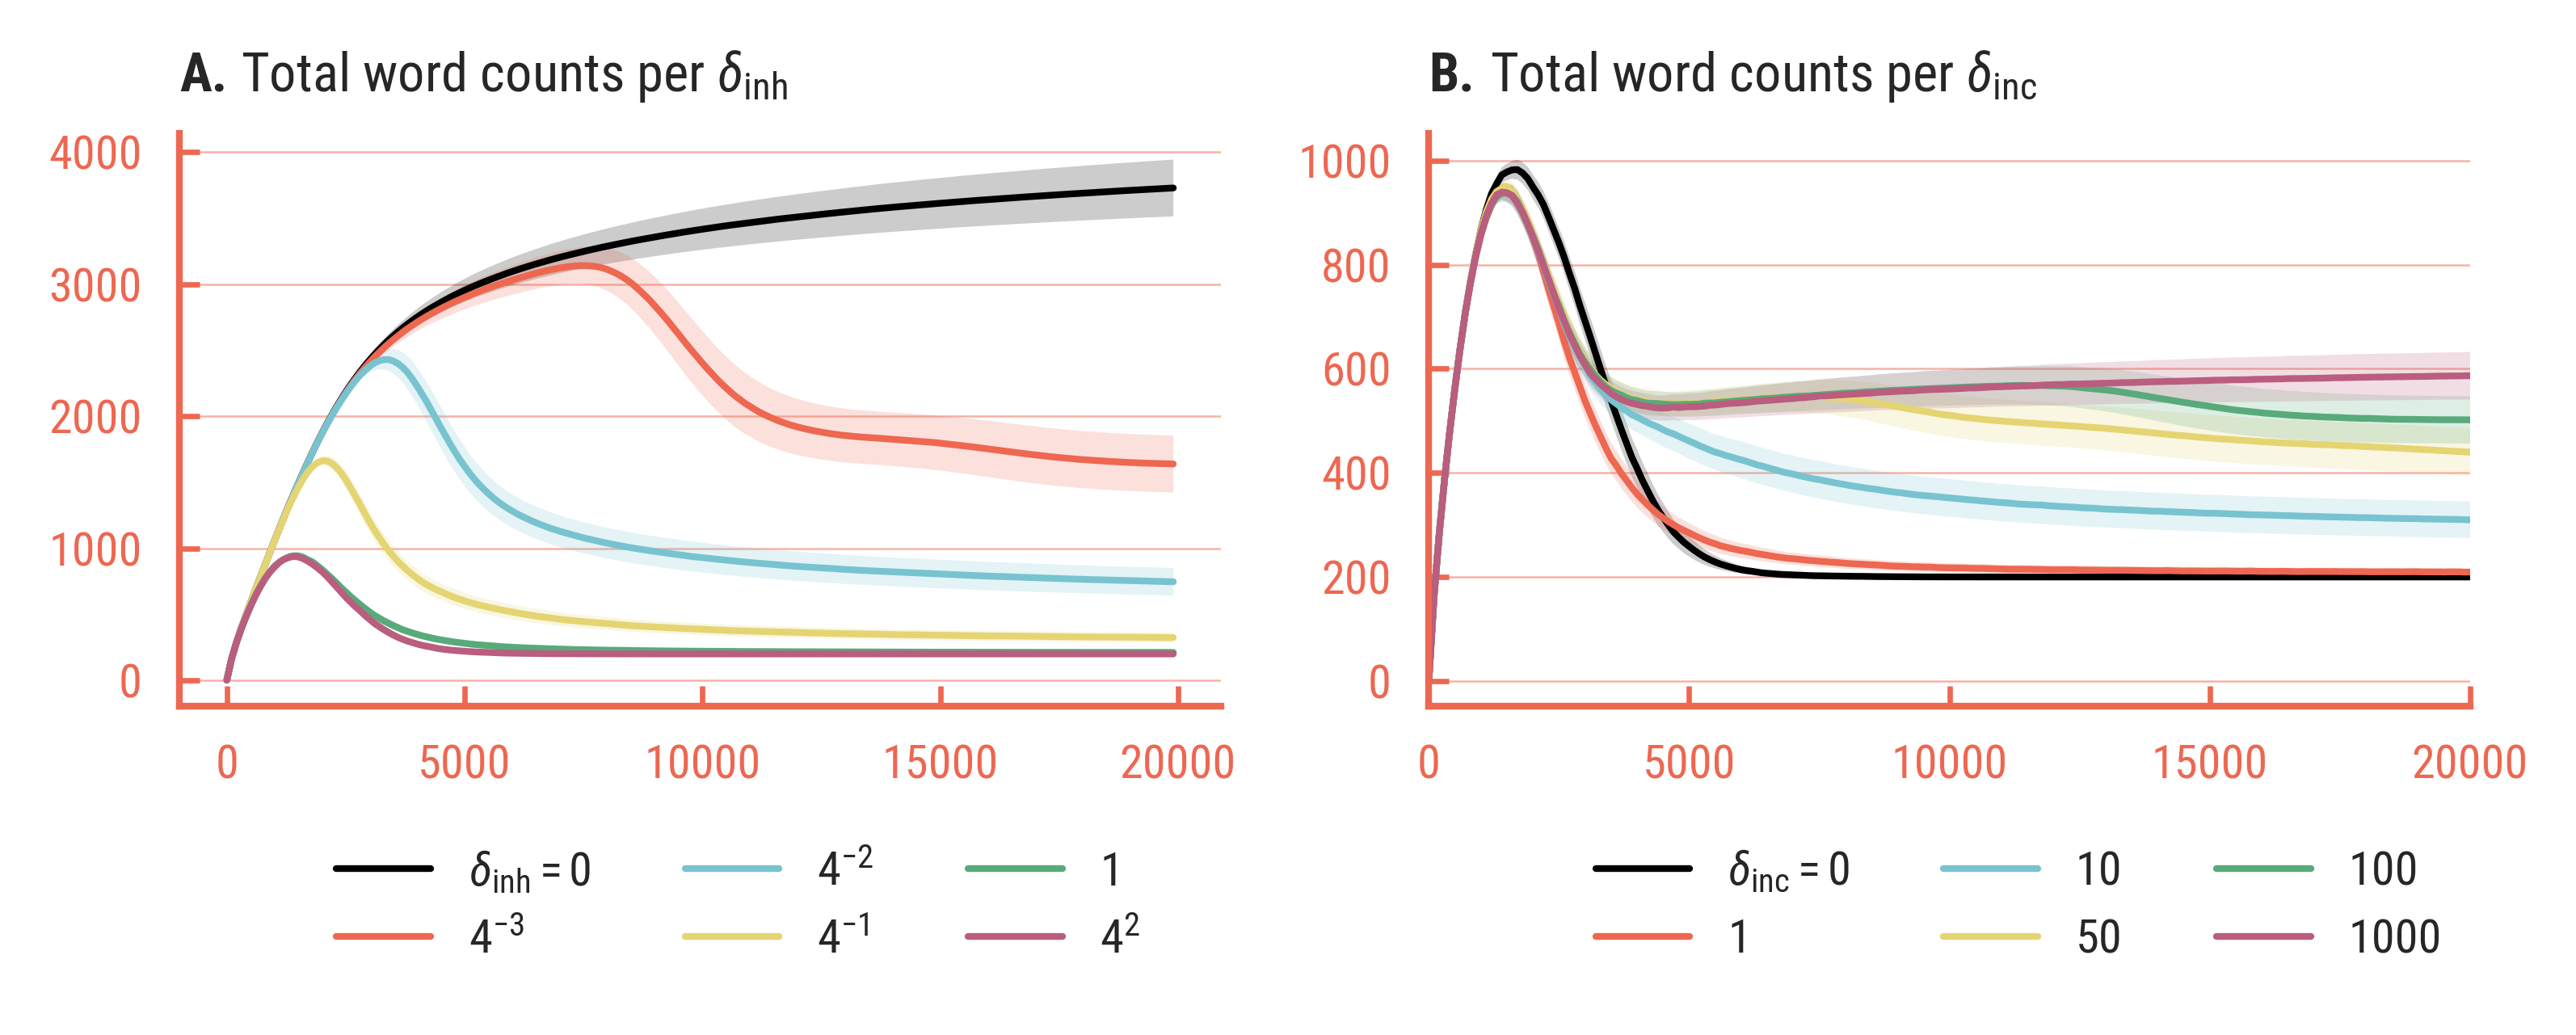

In [7]:
# plot
figure(figsize=cm2inch(12,3))
xs2 = arange(0, params2['T'], params2['res'])
xs3 = arange(0, params3['T'], params3['res'])
d_inhs = [0] + [4**i for i in range(-3,1)] + [16]

def get_label(d_inh):
    if d_inh == 1:
        label = '$1$'
    elif d_inh > 0:
        k = int(log(d_inh)/log(4))
        label = '$4^{'+str(k)+'}$'
    else: 
        label = '$\delta_{\\mathrm{inh}}=0$'
    return label

ax1 = subplot(121)
for d_inh in d_inhs:
    res = data2[d_inh]
    mean = res['num_words']['mean']
    std = res['num_words']['std']
    plot(xs2, mean, label=get_label(d_inh))
    fill_between(xs2, mean+.25*std, mean-.25*std, alpha=.2)

title('Total word counts per $\delta_{\\mathrm{inh}}$')
legend(ncol=3, bbox_to_anchor=(.95,-.2))

d_incs = [0, 1, 10, 50, 100, 1000]
ax2 = subplot(122)
for d_inc in d_incs:
    res = data[str(d_inc)]
    mean = res['num_words']['mean']
    std = res['num_words']['std']
    if d_inc == 0:
        plot(xs3, mean, label='$\delta_{\\mathrm{inc}} = 0$')
    else:
        plot(xs3, mean, label=d_inc)
    fill_between(xs3, mean+.25*std, mean-.25*std, alpha=.2)
title('Total word counts per $\delta_{\\mathrm{inc}}$')
legend(ncol=3, bbox_to_anchor=(1,-.2))
xlim(0,20000)

restyle_title(ax1, ax2)
ax1.yaxis.grid()
ax2.yaxis.grid()
sns.despine()
subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('LING03-02-combined-results.pdf', bbox_inches='tight')
copyfig('LING03-02-combined-results.pdf')